# Hello sympy

This tutorial sources: http://certik.github.io/scipy-2013-tutorial/html/tutorial/ and https://docs.sympy.org/latest/tutorial/index.html

In [53]:
from sympy import *

## Introduction

In [180]:
sqrt(512)

In [224]:
x, y, n, z = symbols("x y n z")
expr = (x/n) + 4*x + 2*y**2
expr

In [182]:
expr - (x/n)

In [183]:
x*expr

In [186]:
expand(x*expr)

In [187]:
diff(sin(x)*exp(x))

In [188]:
integrate(exp(x)*sin(x) + exp(x)*cos(x))

In [189]:
integrate(sin(x**2), (x, -oo, oo))

In [190]:
limit(sin(x)/x, x, 0)

In [191]:
solve(x**2 + 2*x - 3, x)

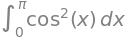

In [192]:
Integral(cos(x)**2, (x, 0, pi))

## Printing

In [193]:
init_printing()

## Gotchas

In [194]:
a, variable = symbols("a variable")
a**variable**a**variable

In [195]:
x, y = symbols("x y")
expr = x + 1
expr

In [196]:
expr.subs(x, 2 + y) # substitution

#### Equals signs

In [197]:
a = x**2 + 2*x + 1
b = (x + 1)**2

a == b

False

In [198]:
Eq(a, b)

In [199]:
simplify(a - b)

In [200]:
simplify(a - 2*b)

#### Numbers

In [201]:
x + 1/3 

In [202]:
x + Rational(1, 3)

## Basic Operations

In [203]:
strexp = "a**2 + 1/2*a - b"
expr = simplify(strexp)
expr

In [204]:
expr = sqrt(-pi) + x
expr.evalf(100, subs={x: 10})

In [205]:
tan(pi/2).evalf()

In [206]:
pi.evalf(100)

In [309]:
import numpy as np

a = np.arange(10)
f = lambdify(x, sin(x), "numpy")
f(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [330]:
import math
f = lambdify(x, sin(x), "math")
f(math.pi)

In [332]:
def my_tiny_sin(x):
    return x

f = lambdify(x, sin(x), {"sin":my_tiny_sin})
f(0.1)

## Simplification (slow but cool)

In [207]:
simplify(sin(x)**2 + cos(x)**2)

In [208]:
simplify(sin(pi+x))

In [209]:
simplify(2*sin((x+y)/2) * cos((x-y)/2))

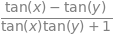

In [210]:
simplify((tan(x) - tan(y)) / (1 + tan(x) * tan(y))) # ha ha!

## Simplification (polynomial/rational)

In [211]:
expand((x + 1)**2)

In [213]:
expand((x + 2)*(x - 10))

In [221]:
factor(x**2-2*x+1)

In [220]:
factor(x**2-8*x-20)

In [229]:
expr = x*y + x - 3 + 2*x**2 - z*x**2 + x**3
expr

In [230]:
collect(expr, x)

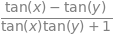

In [231]:
trigsimp((tan(x) - tan(y)) / (1 + tan(x) * tan(y)))

In [233]:
trigsimp(1 - sin(x)**2)

In [234]:
expand_trig(sin(x + y))

In [235]:
powsimp(x**2*x**3)

## Special Functions

In [239]:
x**Rational(1,2)

In [240]:
ln(x)

In [249]:
factorial(n)

In [252]:
binomial(x, y) # Binomial coefficient

In [254]:
gamma(x) # Gamma function

In [255]:
hyper([1, 2], [3], z)

 ┌─  ⎛1, 2 │  ⎞
 ├─  ⎜     │ z⎟
2╵ 1 ⎝ 3   │  ⎠

In [263]:
tan(x).rewrite(cos)

## Calculus

In [271]:
diff(x**4 + 2*x + 1)

In [272]:
integrate(cos(x), x)

In [278]:
limit((n+n**2)/(n**2+1), n, oo)

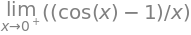

In [285]:
Limit((cos(x) - 1)/x, x, 0, "+")

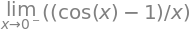

In [290]:
Limit((cos(x) - 1)/x, x, 0, "-")

In [292]:
Limit((cos(x) - 1)/x, x, 0, "+").doit()

In [288]:
limit(1/x, x, 0, '+')

In [293]:
limit(1/x, x, 0, '-')

In [300]:
expr = exp(sin(x))
expr.series(x, 0, 4) # Landau notation O

In [301]:
x + x**3 + x**6 + O(x**4)

In [303]:
1001*O(1)

In [304]:
x*O(1)

## Solvers

In [335]:
solveset(Eq(x**2, 2), x)

In [336]:
solveset(x**2 - 2, x)

In [337]:
solveset(x - x, x)

In [341]:
solveset(x - x, x, domain=S.Naturals0)

In [343]:
solveset(sin(x))

In [344]:
solveset(Eq(x - x, 10), x)

In [351]:
linsolve([1, 1], [10, 1])

## Matrices

In [384]:
M = Matrix([[1,3,4],[5,1,0],[2,5,1]])
M

⎡1  3  4⎤
⎢       ⎥
⎢5  1  0⎥
⎢       ⎥
⎣2  5  1⎦

In [385]:
M.shape

In [386]:
M.col(-1)

⎡4⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣1⎦

In [387]:
M.row(0)

[1  3  4]

In [388]:
M.row_insert(0, Matrix([[99,99,99]])) # Creates a copy of the original matrix

⎡99  99  99⎤
⎢          ⎥
⎢1   3   4 ⎥
⎢          ⎥
⎢5   1   0 ⎥
⎢          ⎥
⎣2   5   1 ⎦

In [389]:
M.col_insert(0, Matrix([99,99,99])) # Creates a copy of the original matrix

⎡99  1  3  4⎤
⎢           ⎥
⎢99  5  1  0⎥
⎢           ⎥
⎣99  2  5  1⎦

In [390]:
M.col_del(0) # Modifies the original matrix
M

⎡3  4⎤
⎢    ⎥
⎢1  0⎥
⎢    ⎥
⎣5  1⎦

In [391]:
M + M

⎡6   8⎤
⎢     ⎥
⎢2   0⎥
⎢     ⎥
⎣10  2⎦

In [392]:
M.T

⎡3  1  5⎤
⎢       ⎥
⎣4  0  1⎦

In [393]:
M*M.T

⎡25  3  19⎤
⎢         ⎥
⎢3   1  5 ⎥
⎢         ⎥
⎣19  5  26⎦

In [394]:
eye(6)

⎡1  0  0  0  0  0⎤
⎢                ⎥
⎢0  1  0  0  0  0⎥
⎢                ⎥
⎢0  0  1  0  0  0⎥
⎢                ⎥
⎢0  0  0  1  0  0⎥
⎢                ⎥
⎢0  0  0  0  1  0⎥
⎢                ⎥
⎣0  0  0  0  0  1⎦

In [395]:
zeros(2,3)

⎡0  0  0⎤
⎢       ⎥
⎣0  0  0⎦

In [397]:
ones(3, 3)

⎡1  1  1⎤
⎢       ⎥
⎢1  1  1⎥
⎢       ⎥
⎣1  1  1⎦

In [401]:
N = Matrix([[1, 0, 1], [2, -1, 3], [4, 3, 2]])
N.det()